In [73]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s

import datetime as dt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

plt.rcParams['figure.figsize'] = [15,8]

In [74]:
df = p.read_csv('train.csv')
df_test = p.read_csv('test.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [75]:
y = df.Price

In [76]:
df = df.drop(['Price'],axis=1)
df_test=df_test.drop(['Price'],axis=1)
df_merge = df.append(df_test)
df_merge.reset_index(inplace=True)
df_merge= df_merge.drop(['index'],axis=1)
df_merge.shape

C:\Users\91748\AppData\Local\Temp/ipykernel_36128/3317493069.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merge = df.append(df_test)


(27482, 17)

In [77]:
dtype_info = p.DataFrame()
dtype_info['Unique'] = df_merge.nunique()
dtype_info['DType'] = df_merge.dtypes
dtype_info

,Unique,DType
ID,26886,int64
Levy,635,object
Manufacturer,68,object
Model,1981,object
Prod. year,59,int64
Category,11,object
Leather interior,2,object
Fuel type,7,object
Engine volume,112,object
Mileage,9977,object


# Data Cleaning


##### Converting Mileage to Floating Values AND replacing '0's with mean values of Mileage Column

In [78]:
#Conversion Part
#df_merge.Mileage = df.Mileage.apply(lambda x: float(int(x.split()[0]))/1000)
df_merge['Mileage'] = p.to_numeric(df_merge.Mileage.str.split(' ').str[0], downcast='float')
#Mean Part
df_merge['Mileage'] = np.where(df_merge['Mileage'] == 0.0,df_merge['Mileage'].mean(),df_merge['Mileage'])

#### Fixing Doors

In [79]:
df_merge['Doors'].unique()
df_merge.Doors = np.where((df_merge.Doors == '04-May') | (df_merge.Doors == '02-Mar'), df_merge.Doors.str.split('-').str[0],df_merge.Doors)

#### Taking Care of '-'s And Replacing With Mean

In [80]:
#Replacing hyphens with 0s
def replaceHyphen(n):
    if n == '-':
        return 0.0
    return float(n)
df_merge.Levy = df_merge.Levy.apply(lambda x: replaceHyphen(x))

#Replacing 0s mean of levy vals
levy_mean = int(df_merge.Levy.mean())
def replaceZeroLevy(n):
    if int(n) == 0:
        return levy_mean
    return n
df_merge.Levy = df_merge.Levy.apply(lambda x: replaceZeroLevy(x))

#### Splitting Turbo and Non Turbo Classes

In [81]:
#Getting raw number 
def convToVol(n):
    n = str(n).strip()
    tokens = n.split()
    return float(tokens[0])
#Splitting Turbo and non turbo engine types
def TurboClass(n):
    n = str(n).strip()
    tokens = n.split()
    if len(tokens) == 1:
        return 0
    else:
        return 1

df_merge['Turbo'] = df_merge['Engine volume'].apply(lambda x: TurboClass(x))
df['Engine volume'] = df['Engine volume'].apply(lambda x: convToVol(x))
df_merge['Turbo'].sum()

2759

In [82]:
current = dt.datetime.now()
df_merge['Prod. year'] = current.year - df_merge['Prod. year']

<AxesSubplot:>

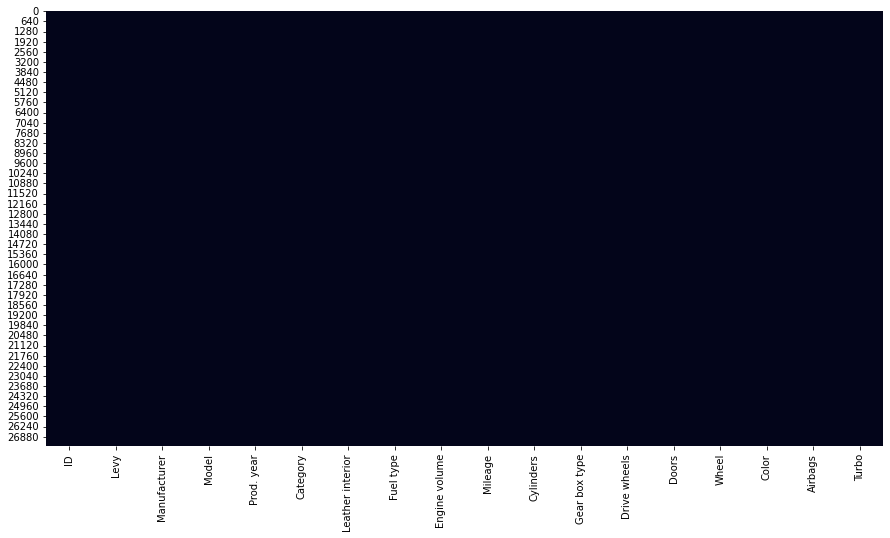

In [83]:
s.heatmap(df_merge.isnull(), cbar=False)


<AxesSubplot:>

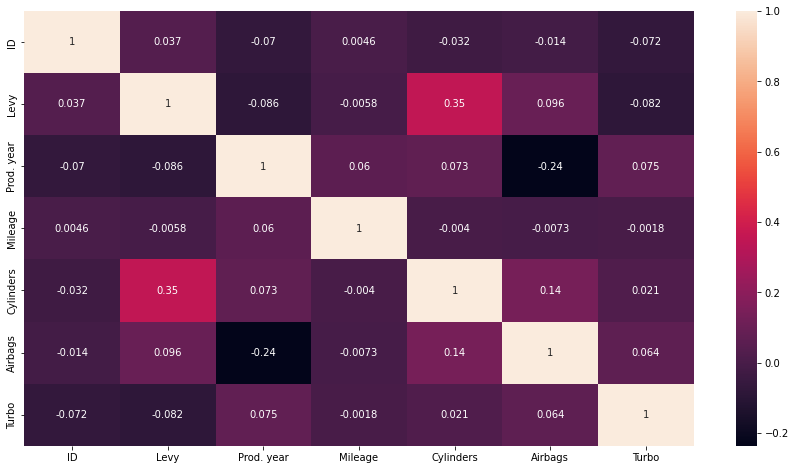

In [85]:
s.heatmap(df_merge.corr(), cbar=True, annot=True)

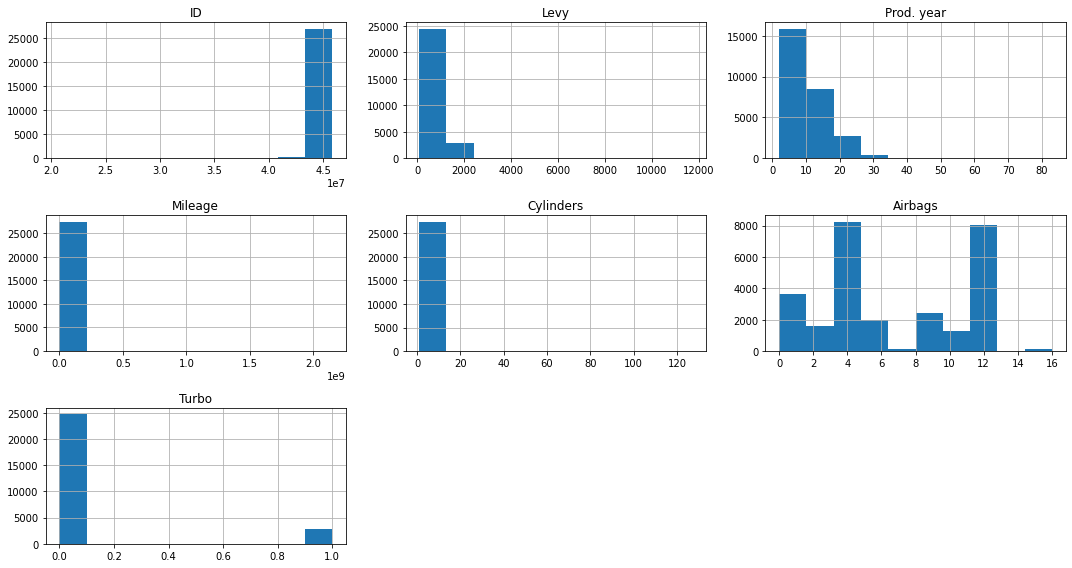

In [89]:
df_merge.hist()
plt.tight_layout()